### Configuração e preparação dos Dados


---



In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/.kaggle"

In [2]:
!kaggle datasets download -d edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 92% 47.0M/50.9M [00:01<00:00, 35.5MB/s]
100% 50.9M/50.9M [00:01<00:00, 33.5MB/s]


In [3]:
!unzip quality-prediction-in-a-mining-process.zip

Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


In [4]:
!ls

drive					    quality-prediction-in-a-mining-process.zip
MiningProcess_Flotation_Plant_Database.csv  sample_data


Importando bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
raw_data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv',decimal=',')
raw_data.head()

date  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0  2017-03-10 01:00:00         55.2          16.98      3019.53     557.434   
1  2017-03-10 01:00:00         55.2          16.98      3024.41     563.965   
2  2017-03-10 01:00:00         55.2          16.98      3043.46     568.054   
3  2017-03-10 01:00:00         55.2          16.98      3047.36     568.665   
4  2017-03-10 01:00:00         55.2          16.98      3033.69     558.167   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0        395.713      10.0664              1.74                       249.214   
1        397.383      10.0672              1.74                       249.719   
2        399.668      10.0680              1.74                       249.741   
3        397.939      10.0689              1.74                       249.917   
4        400.254      10.0697              1.74                       250.203   

   Flotation Column 02 Air Flow  ...  Flotation Column 07 Air Flow  \
0                       253.235  ...                       250.884   
1                       250.532  ...                       248.994   
2                       247.874  ...                       248.071   
3                       254.487  ...                       251.147   
4                       252.136  ...                       248.928   

   Flotation Column 01 Level  Flotation Column 02 Level  \
0                    457.396                    432.962   
1                    451.891                    429.560   
2                    451.240                    468.927   
3                    452.441                    458.165   
4                    452.441                    452.900   

   Flotation Column 03 Level  Flotation Column 04 Level  \
0                    424.954                    443.558   
1                    432.939                    448.086   
2                    434.610                    449.688   
3                    442.865                    446.210   
4                    450.523                    453.670   

   Flotation Column 05 Level  Flotation Column 06 Level  \
0                    502.255                    446.370   
1                    496.363                    445.922   
2                    484.411                    447.826   
3                    471.411                    437.690   
4                    462.598                    443.682   

   Flotation Column 07 Level  % Iron Concentrate  % Silica Concentrate  
0                    523.344               66.91                  1.31  
1                    498.075               66.91                  1.31  
2                    458.567               66.91                  1.31  
3                    427.669               66.91                  1.31  
4                    425.679               66.91                  1.31  

[5 rows x 24 columns]

In [7]:
datidx = pd.to_datetime(raw_data['date'])
raw_data.index = datidx
raw_data.drop('date',axis=1,inplace= True)

In [8]:
df= raw_data[raw_data['% Silica Concentrate'].shift() != raw_data['% Silica Concentrate']]
df_resampled = df.resample('H').last().round(2)
df_resampled


% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00        55.20          16.98      3019.53      557.43   
2017-03-10 02:00:00        55.20          16.98      3170.41      539.67   
2017-03-10 03:00:00        55.20          16.98      3365.65      573.52   
2017-03-10 04:00:00        55.20          16.98      2693.75      592.13   
2017-03-10 05:00:00        55.20          16.98      2352.22      601.81   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00        49.75          23.20      2888.06      494.99   
2017-09-09 20:00:00        49.75          23.20      4218.57      492.03   
2017-09-09 21:00:00        49.75          23.20      3159.10      520.99   
2017-09-09 22:00:00        49.75          23.20      3348.19      511.96   
2017-09-09 23:00:00        49.75          23.20      2983.08      461.28   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00         395.71        10.07              1.74   
2017-03-10 02:00:00         399.70        10.16              1.67   
2017-03-10 03:00:00         399.02        10.09              1.71   
2017-03-10 04:00:00         409.20         9.95              1.72   
2017-03-10 05:00:00         398.14         9.84              1.76   
...                            ...          ...               ...   
2017-09-09 19:00:00         376.47         9.28              1.67   
2017-09-09 20:00:00         378.63         9.16              1.65   
2017-09-09 21:00:00         381.47         9.58              1.74   
2017-09-09 22:00:00         379.68         9.89              1.74   
2017-09-09 23:00:00         378.69         9.68              1.69   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                        249.21   
2017-03-10 02:00:00                        249.29   
2017-03-10 03:00:00                        249.38   
2017-03-10 04:00:00                        248.30   
2017-03-10 05:00:00                        248.95   
...                                           ...   
2017-09-09 19:00:00                        317.06   
2017-09-09 20:00:00                        302.08   
2017-09-09 21:00:00                        296.06   
2017-09-09 22:00:00                        301.65   
2017-09-09 23:00:00                        301.38   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                        253.24   
2017-03-10 02:00:00                        248.27   
2017-03-10 03:00:00                        253.31   
2017-03-10 04:00:00                        251.91   
2017-03-10 05:00:00                        246.31   
...                                           ...   
2017-09-09 19:00:00                        297.75   
2017-09-09 20:00:00                        301.35   
2017-09-09 21:00:00                        298.48   
2017-09-09 22:00:00                        298.36   
2017-09-09 23:00:00                        298.83   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                        250.58  ...   
2017-03-10 02:00:00                        248.31  ...   
2017-03-10 03:00:00                        252.09  ...   
2017-03-10 04:00:00                        251.12  ...   
2017-03-10 05:00:00                        248.07  ...   
...                                           ...  ...   
2017-09-09 19:00:00                        301.68  ...   
2017-09-09 20:00:00                        300.54  ...   
2017-09-09 21:00:00                        299.08  ...   
2017-09-09 22:00:00                        298.23  ...   
2017-09-09 23:00:00                        297.99  ...   


In [9]:
df_resampled['% Silica Concentrate delay'] = df_resampled['% Silica Concentrate'].shift(freq= '-2h')
df_resampled

% Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
date                                                                       
2017-03-10 01:00:00        55.20          16.98      3019.53      557.43   
2017-03-10 02:00:00        55.20          16.98      3170.41      539.67   
2017-03-10 03:00:00        55.20          16.98      3365.65      573.52   
2017-03-10 04:00:00        55.20          16.98      2693.75      592.13   
2017-03-10 05:00:00        55.20          16.98      2352.22      601.81   
...                          ...            ...          ...         ...   
2017-09-09 19:00:00        49.75          23.20      2888.06      494.99   
2017-09-09 20:00:00        49.75          23.20      4218.57      492.03   
2017-09-09 21:00:00        49.75          23.20      3159.10      520.99   
2017-09-09 22:00:00        49.75          23.20      3348.19      511.96   
2017-09-09 23:00:00        49.75          23.20      2983.08      461.28   

                     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
date                                                                
2017-03-10 01:00:00         395.71        10.07              1.74   
2017-03-10 02:00:00         399.70        10.16              1.67   
2017-03-10 03:00:00         399.02        10.09              1.71   
2017-03-10 04:00:00         409.20         9.95              1.72   
2017-03-10 05:00:00         398.14         9.84              1.76   
...                            ...          ...               ...   
2017-09-09 19:00:00         376.47         9.28              1.67   
2017-09-09 20:00:00         378.63         9.16              1.65   
2017-09-09 21:00:00         381.47         9.58              1.74   
2017-09-09 22:00:00         379.68         9.89              1.74   
2017-09-09 23:00:00         378.69         9.68              1.69   

                     Flotation Column 01 Air Flow  \
date                                                
2017-03-10 01:00:00                        249.21   
2017-03-10 02:00:00                        249.29   
2017-03-10 03:00:00                        249.38   
2017-03-10 04:00:00                        248.30   
2017-03-10 05:00:00                        248.95   
...                                           ...   
2017-09-09 19:00:00                        317.06   
2017-09-09 20:00:00                        302.08   
2017-09-09 21:00:00                        296.06   
2017-09-09 22:00:00                        301.65   
2017-09-09 23:00:00                        301.38   

                     Flotation Column 02 Air Flow  \
date                                                
2017-03-10 01:00:00                        253.24   
2017-03-10 02:00:00                        248.27   
2017-03-10 03:00:00                        253.31   
2017-03-10 04:00:00                        251.91   
2017-03-10 05:00:00                        246.31   
...                                           ...   
2017-09-09 19:00:00                        297.75   
2017-09-09 20:00:00                        301.35   
2017-09-09 21:00:00                        298.48   
2017-09-09 22:00:00                        298.36   
2017-09-09 23:00:00                        298.83   

                     Flotation Column 03 Air Flow  ...  \
date                                               ...   
2017-03-10 01:00:00                        250.58  ...   
2017-03-10 02:00:00                        248.31  ...   
2017-03-10 03:00:00                        252.09  ...   
2017-03-10 04:00:00                        251.12  ...   
2017-03-10 05:00:00                        248.07  ...   
...                                           ...  ...   
2017-09-09 19:00:00                        301.68  ...   
2017-09-09 20:00:00                        300.54  ...   
2017-09-09 21:00:00                        299.08  ...   
2017-09-09 22:00:00                        298.23  ...   
2017-09-09 23:00:00                        297.99  ...   


In [10]:
df_resampled.dropna(inplace=True)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3490 entries, 2017-03-10 01:00:00 to 2017-09-09 21:00:00
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3490 non-null   float64
 1   % Silica Feed                 3490 non-null   float64
 2   Starch Flow                   3490 non-null   float64
 3   Amina Flow                    3490 non-null   float64
 4   Ore Pulp Flow                 3490 non-null   float64
 5   Ore Pulp pH                   3490 non-null   float64
 6   Ore Pulp Density              3490 non-null   float64
 7   Flotation Column 01 Air Flow  3490 non-null   float64
 8   Flotation Column 02 Air Flow  3490 non-null   float64
 9   Flotation Column 03 Air Flow  3490 non-null   float64
 10  Flotation Column 04 Air Flow  3490 non-null   float64
 11  Flotation Column 05 Air Flow  3490 non-null   float64
 12  Flotation Column 06 Air Fl

In [11]:
df_resampled['Air Flow Mean'] = df_resampled[['Flotation Column 01 Air Flow','Flotation Column 02 Air Flow','Flotation Column 03 Air Flow']].mean(axis=1)
df_resampled['Level Mean'] = df_resampled[['Flotation Column 04 Level','Flotation Column 05 Level','Flotation Column 06 Level','Flotation Column 07 Level']].mean(axis=1)


In [12]:
features = [
    'Amina Flow',
    'Ore Pulp pH',
    'Flotation Column 01 Air Flow',
    'Flotation Column 02 Air Flow',
    'Flotation Column 03 Air Flow',
    'Flotation Column 04 Level',
    'Flotation Column 05 Level',
    'Flotation Column 06 Level',
    'Flotation Column 07 Level',
]

features_agg = [
    'Amina Flow',
    'Ore Pulp pH',
    'Air Flow Mean',
    'Level Mean'
]

target = ['% Silica Concentrate delay']

### Modelos utilizando todas as features e normalizadas por Min-Max

---

In [13]:
x=df_resampled[features]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [14]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 9) (2233, 1)
(559, 9) (559, 1)
(698, 9) (698, 1)


In [15]:
#Criando DF para resultado
result_minmax_full = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

MAE =  0.884935643642188
MSE =  1.2339935282939332
R2 =  -0.033463279066596296


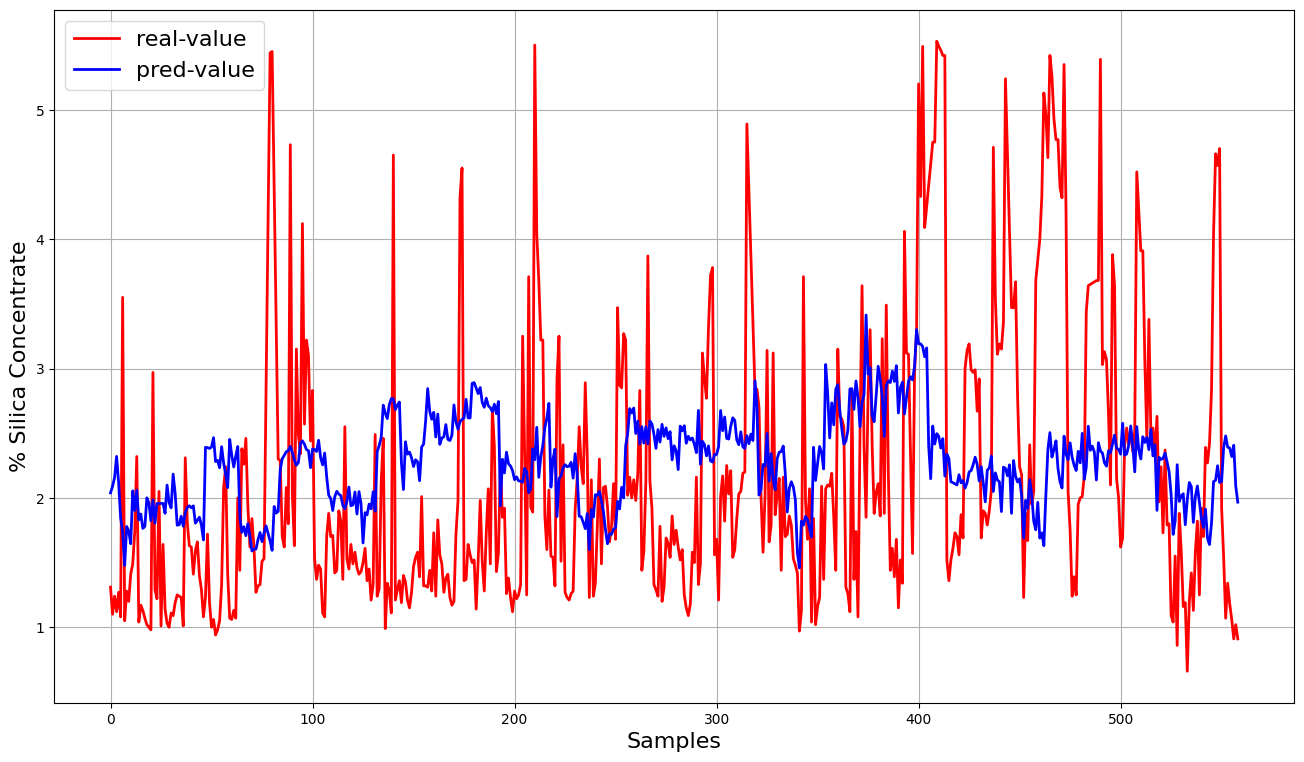

In [16]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_full.loc[len(result_minmax_full)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Modelo Polinomial

MAE =  1.0227188224058361
MSE =  1.8747059834908268
R2 =  -0.5700566887598024


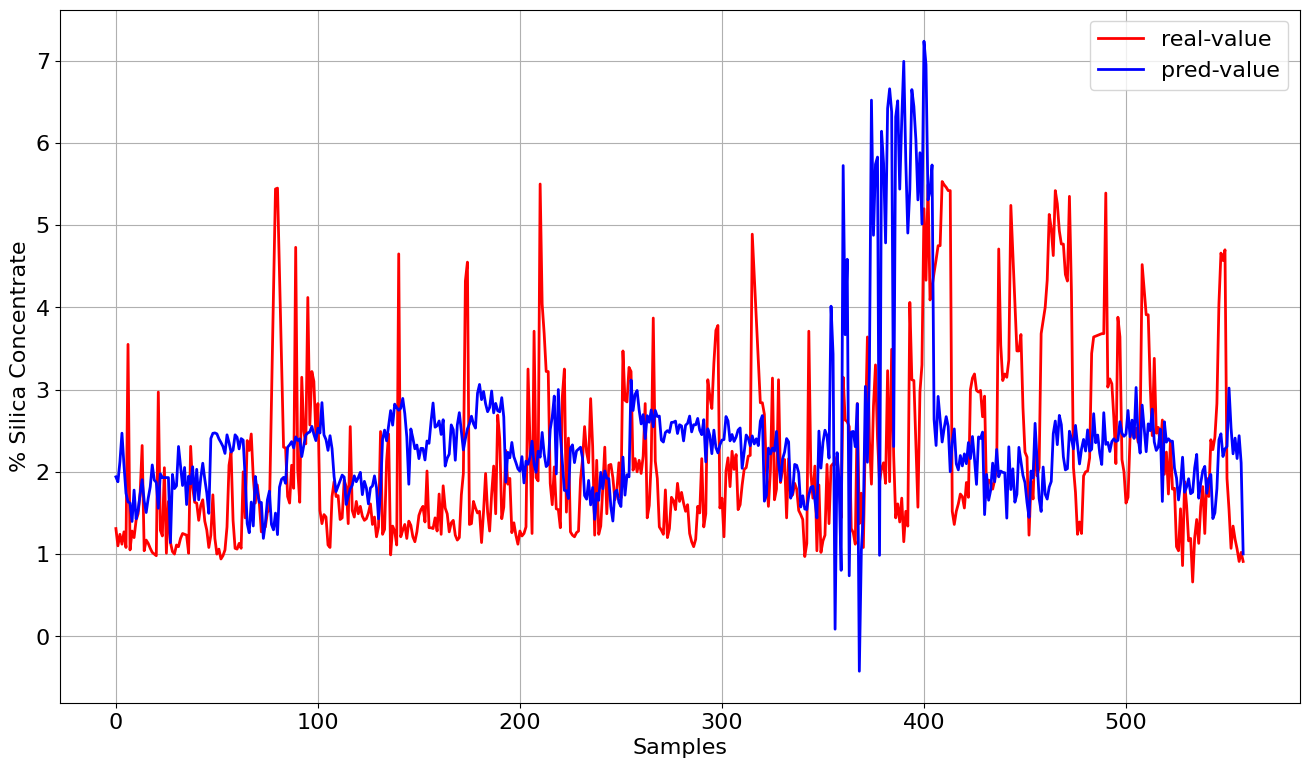

In [17]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Support Vecto Machine - SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8229658827925059
MSE =  1.2738880268338626
R2 =  -0.06687471788896615


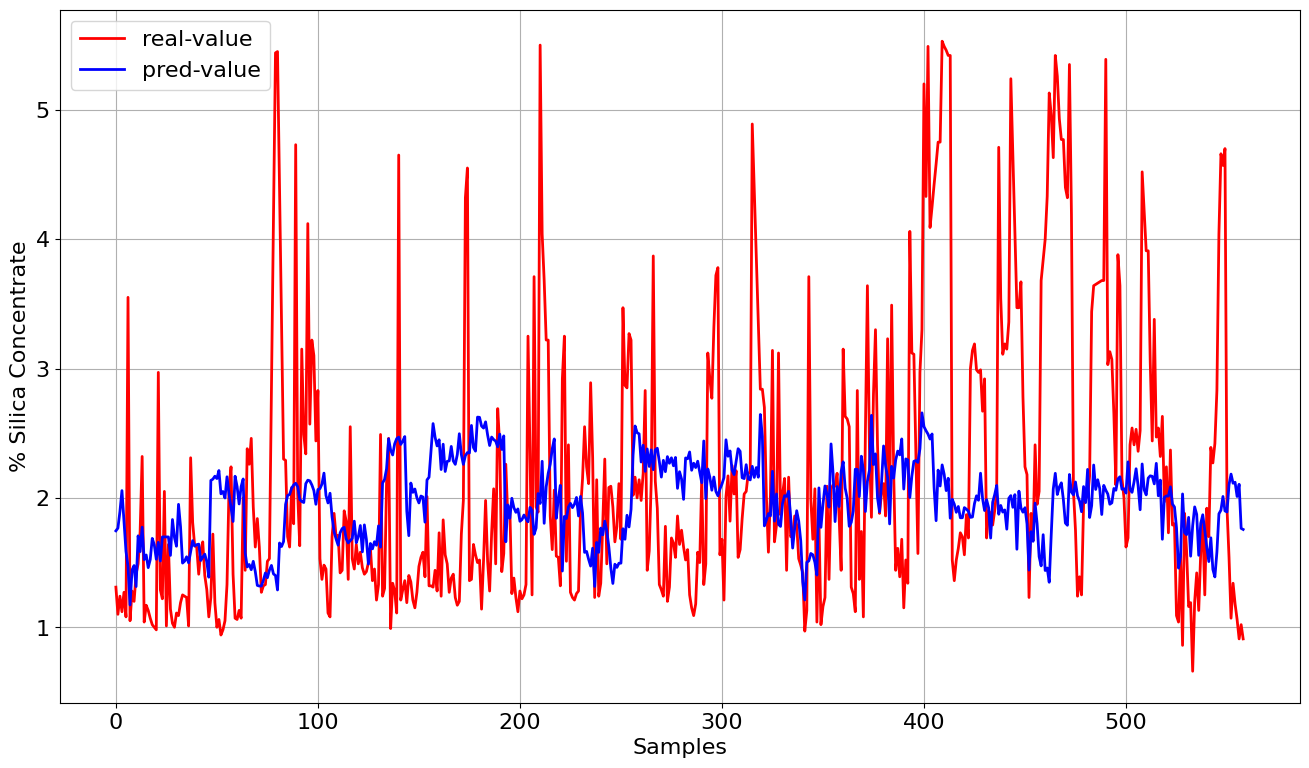

In [18]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8374936948955178
MSE =  1.3738653134452643
R2 =  -0.15060518493318953


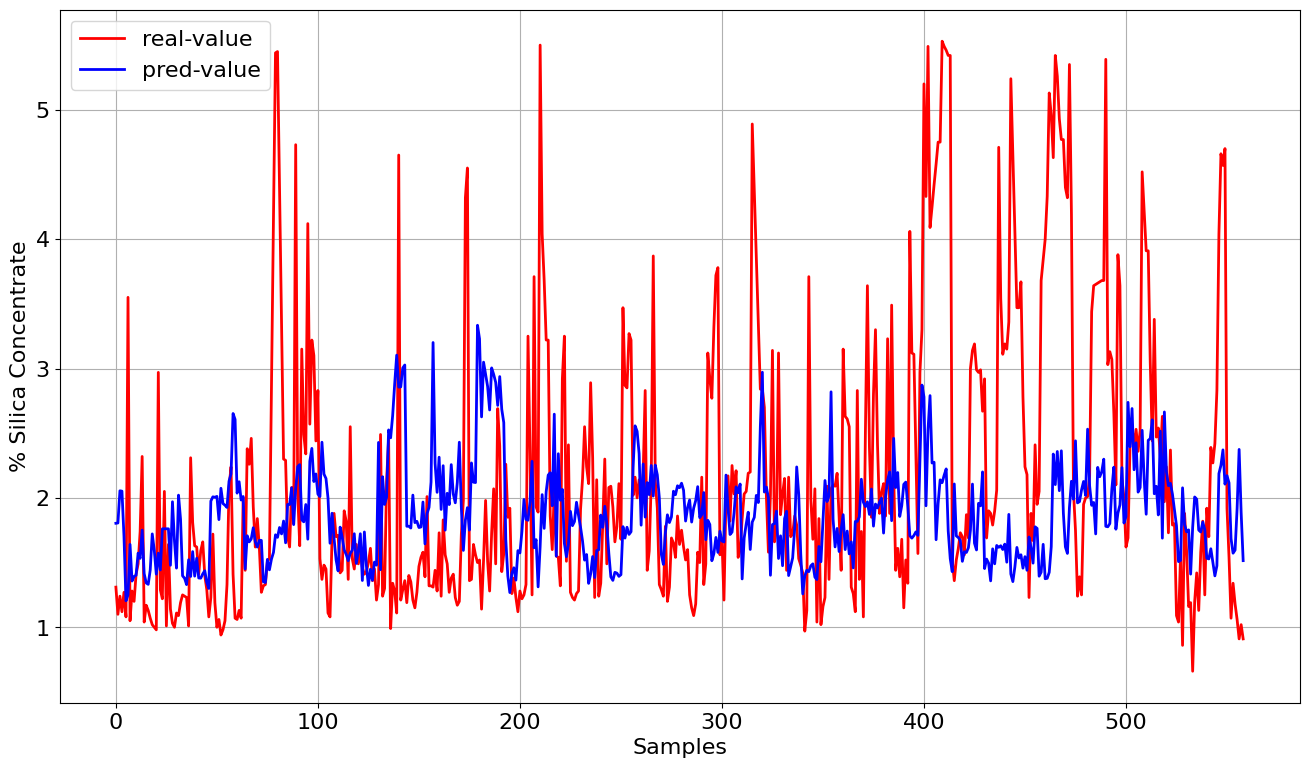

In [19]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.82342642815199
MSE =  1.2660692128098876
R2 =  -0.06032650106743964


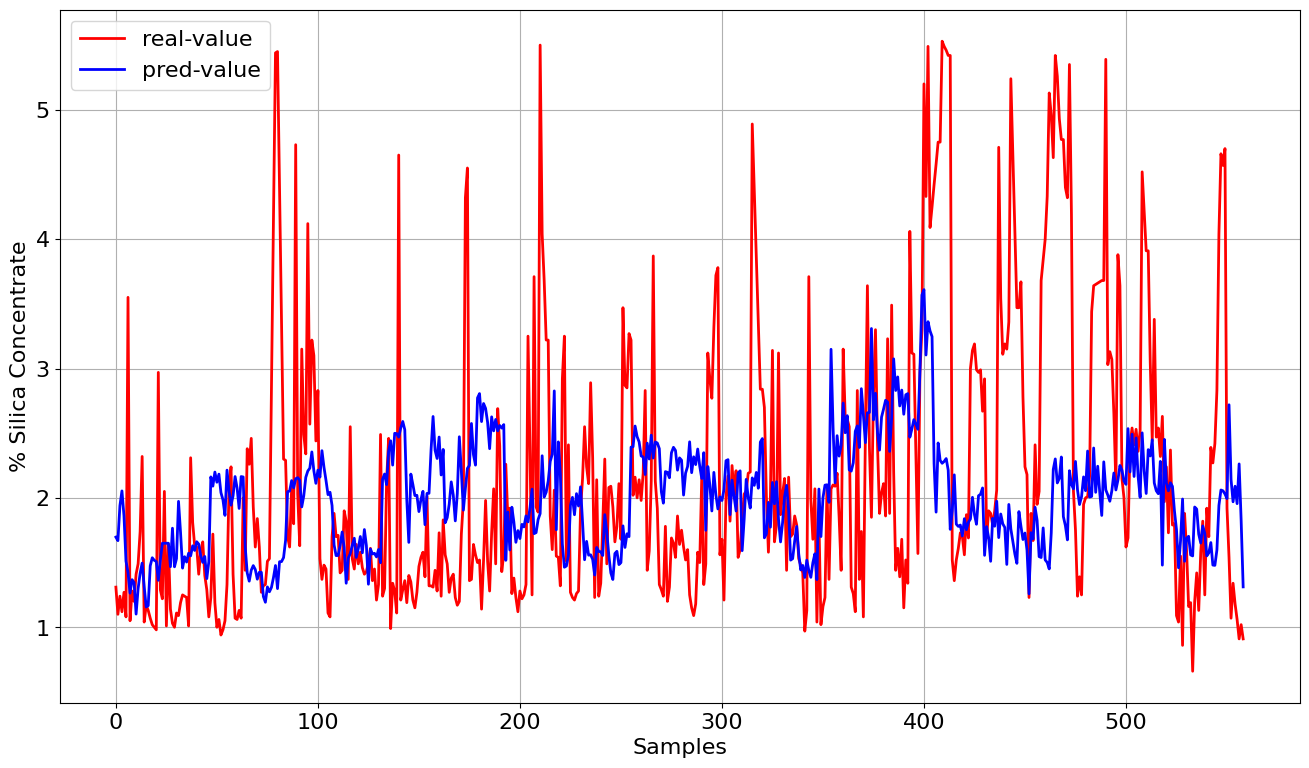

In [20]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.8859422540250446
MSE =  1.2424317275359567
R2 =  -0.040530227845602784


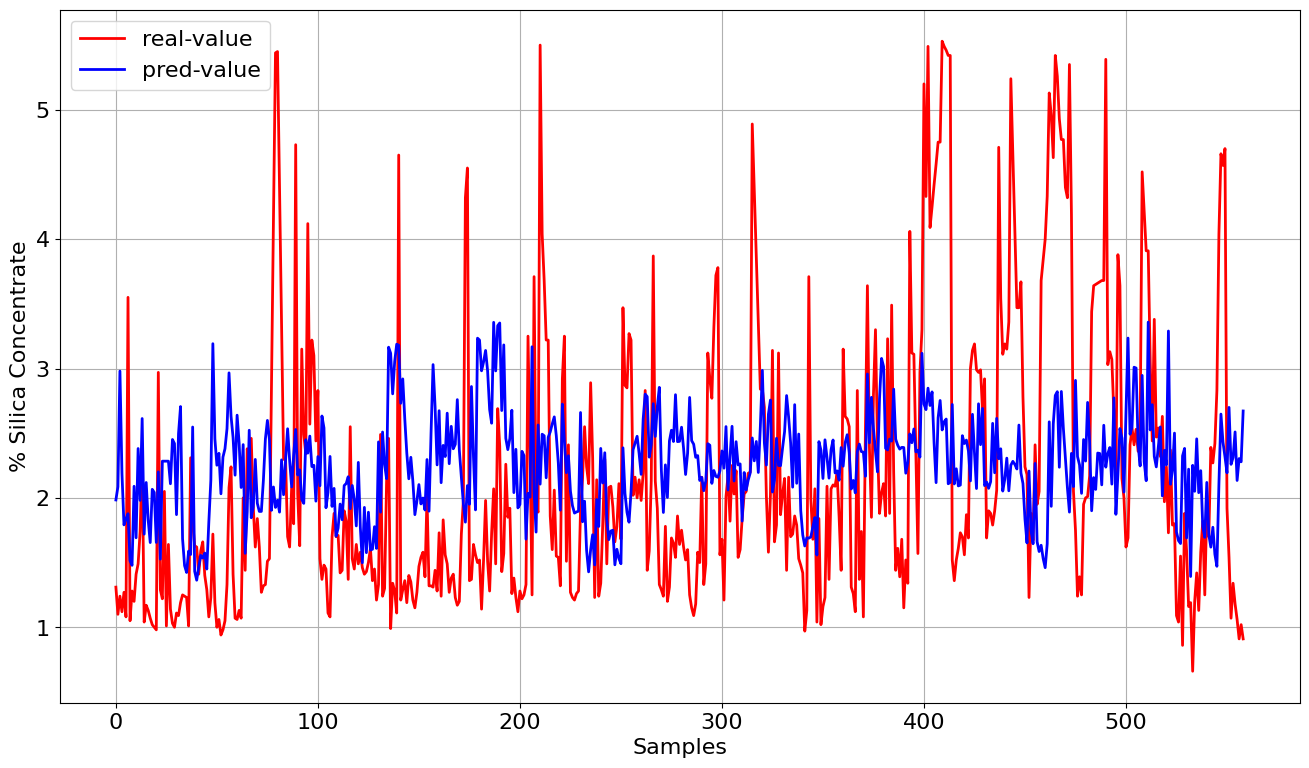

In [21]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.867751000577643
MSE =  1.2071370444411
R2 =  -0.010971110971419007


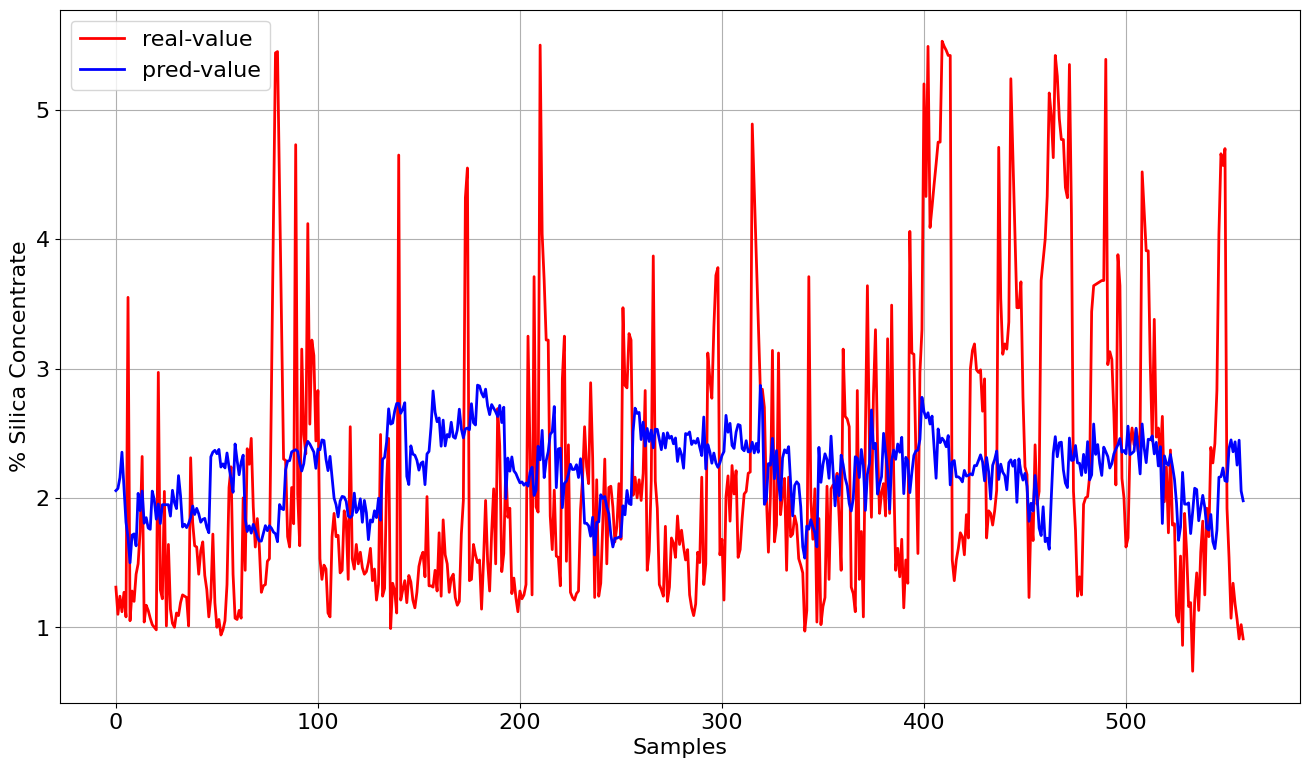

In [22]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_full.loc[len(result_minmax_full)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### Modelos utilizando todas as features e normalizadas por z-norm

---

In [27]:
x=df_resampled[features]
y=df_resampled[target]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [28]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 9) (2233, 1)
(559, 9) (559, 1)
(698, 9) (698, 1)


In [29]:
#Criando DF para resultado
result_znorm_full = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

MAE =  0.884935643642187
MSE =  1.2339935282939325
R2 =  -0.03346327906659563


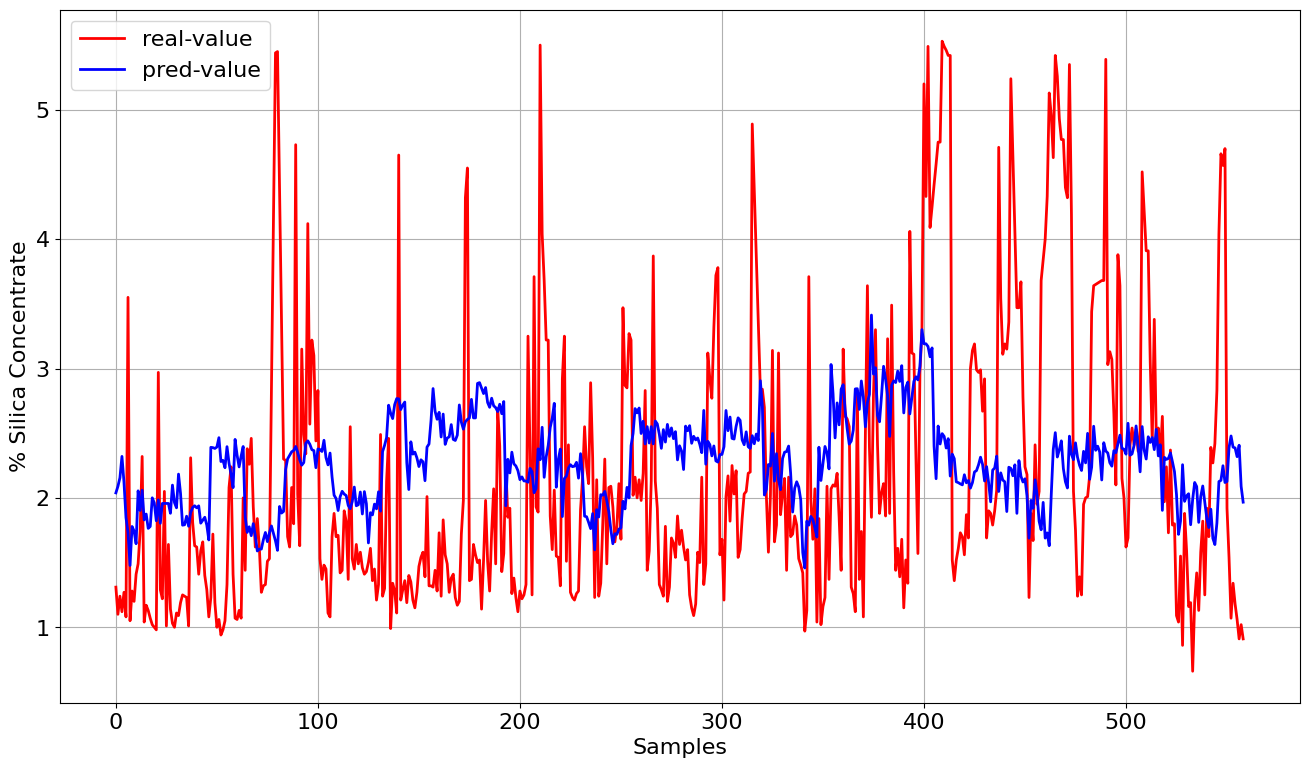

In [30]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_full.loc[len(result_znorm_full)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Modelo Polinomial

MAE =  1.0227188224058268
MSE =  1.874705983490794
R2 =  -0.5700566887597749


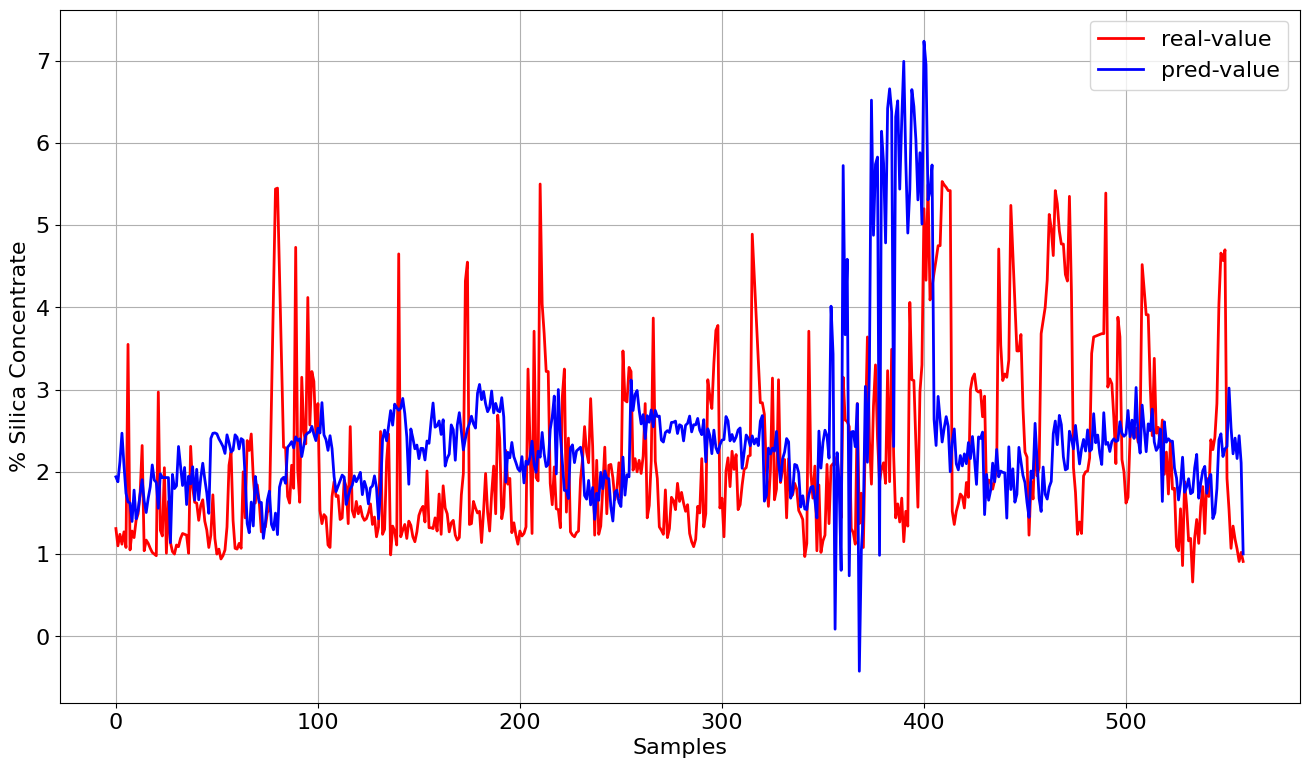

In [31]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Support Vecto Machine - SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8253265970346759
MSE =  1.2723009924944455
R2 =  -0.06554558473324135


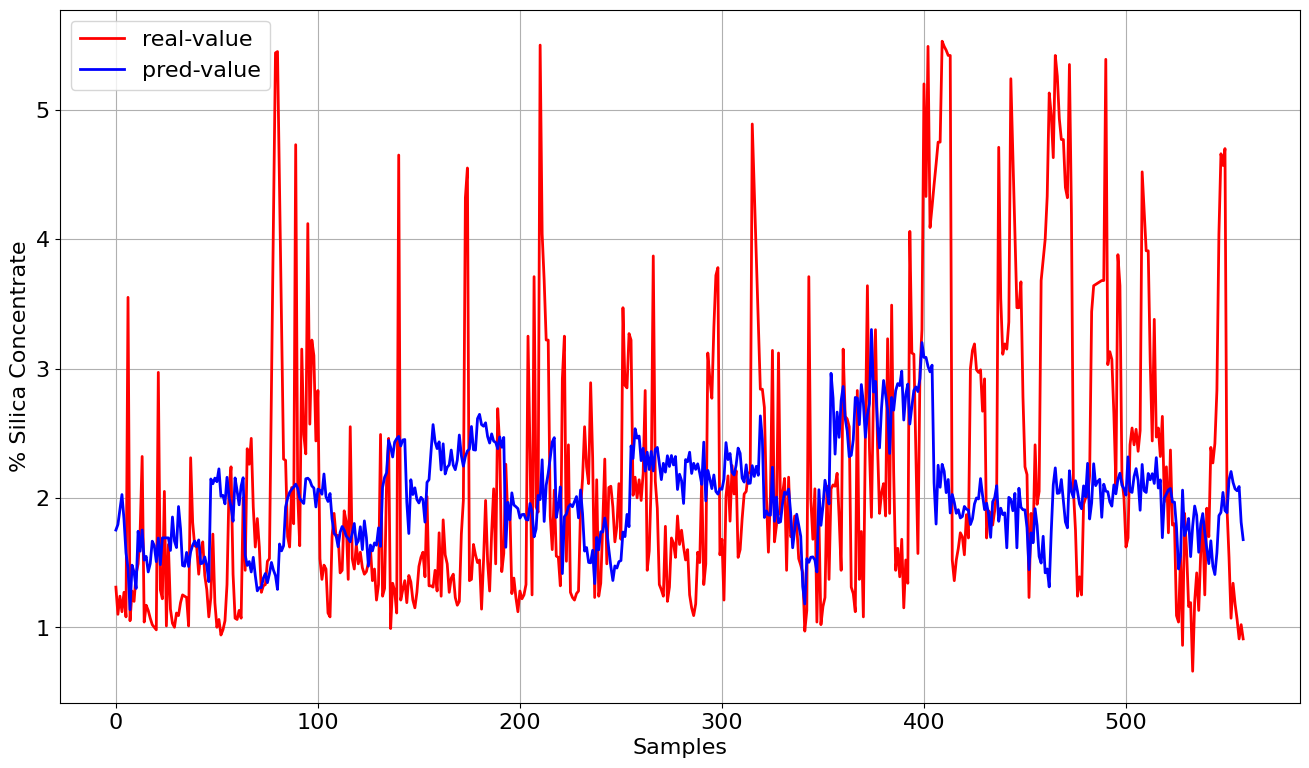

In [32]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8447491642229609
MSE =  1.3782647282593212
R2 =  -0.15428967237616287


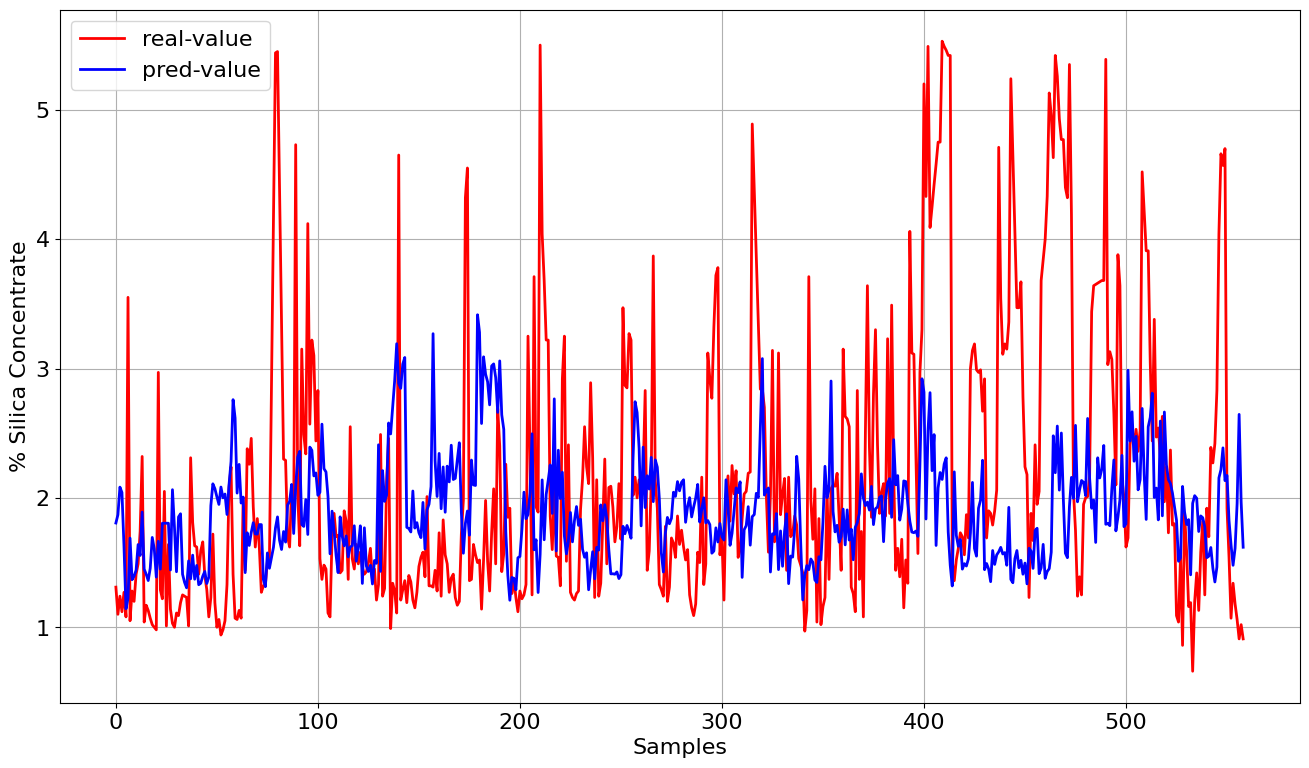

In [33]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.9846681270309956
MSE =  1.7801638033435716
R2 =  -0.49087809562716966


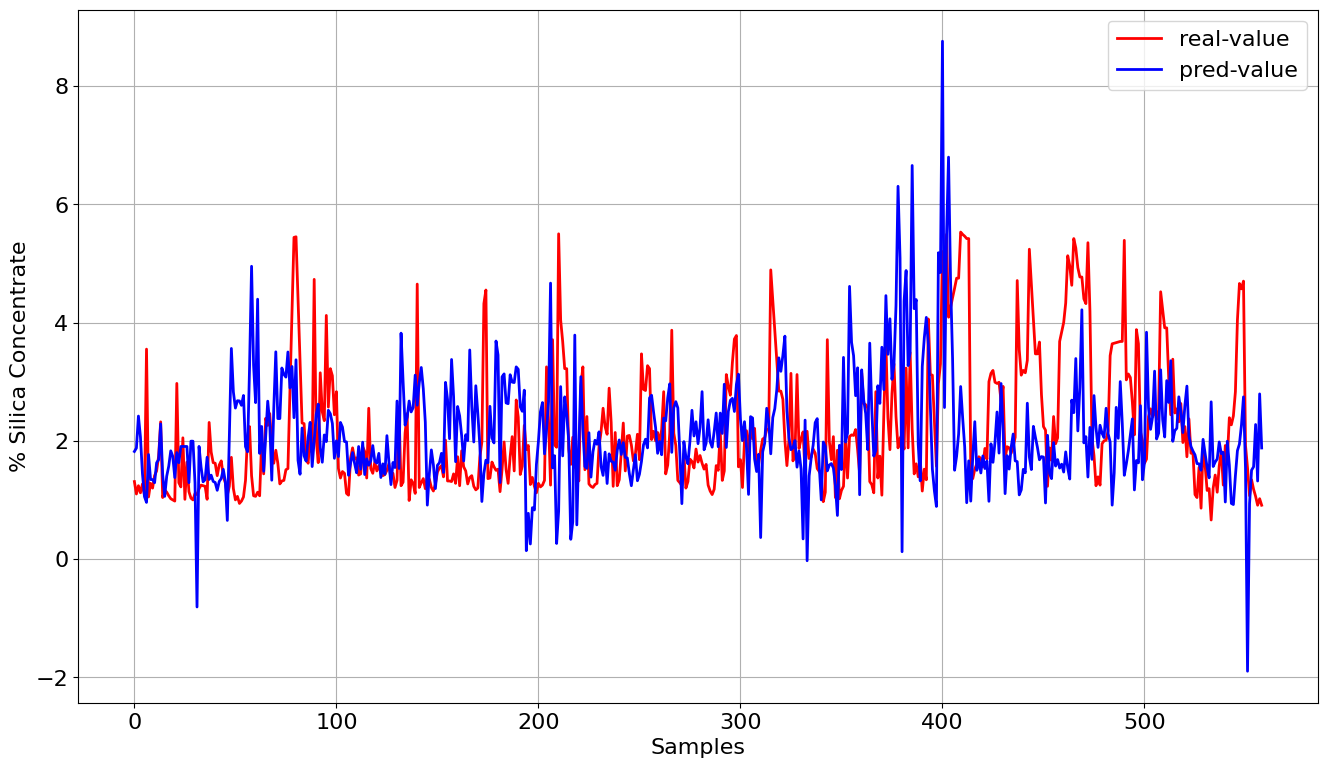

In [34]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.8855860286225401
MSE =  1.2416371815443645
R2 =  -0.03986479963466616


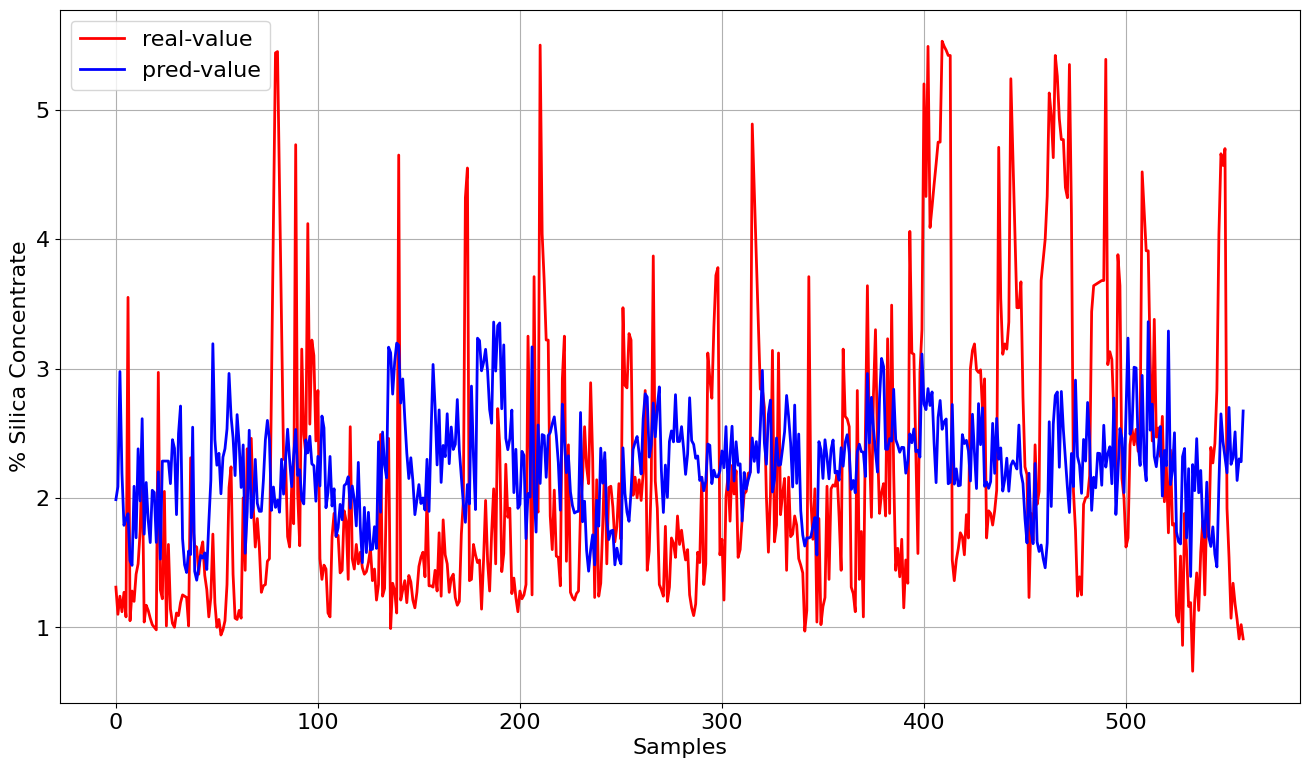

In [35]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8811683674123711
MSE =  1.3370241761341655
R2 =  -0.11975092054923397


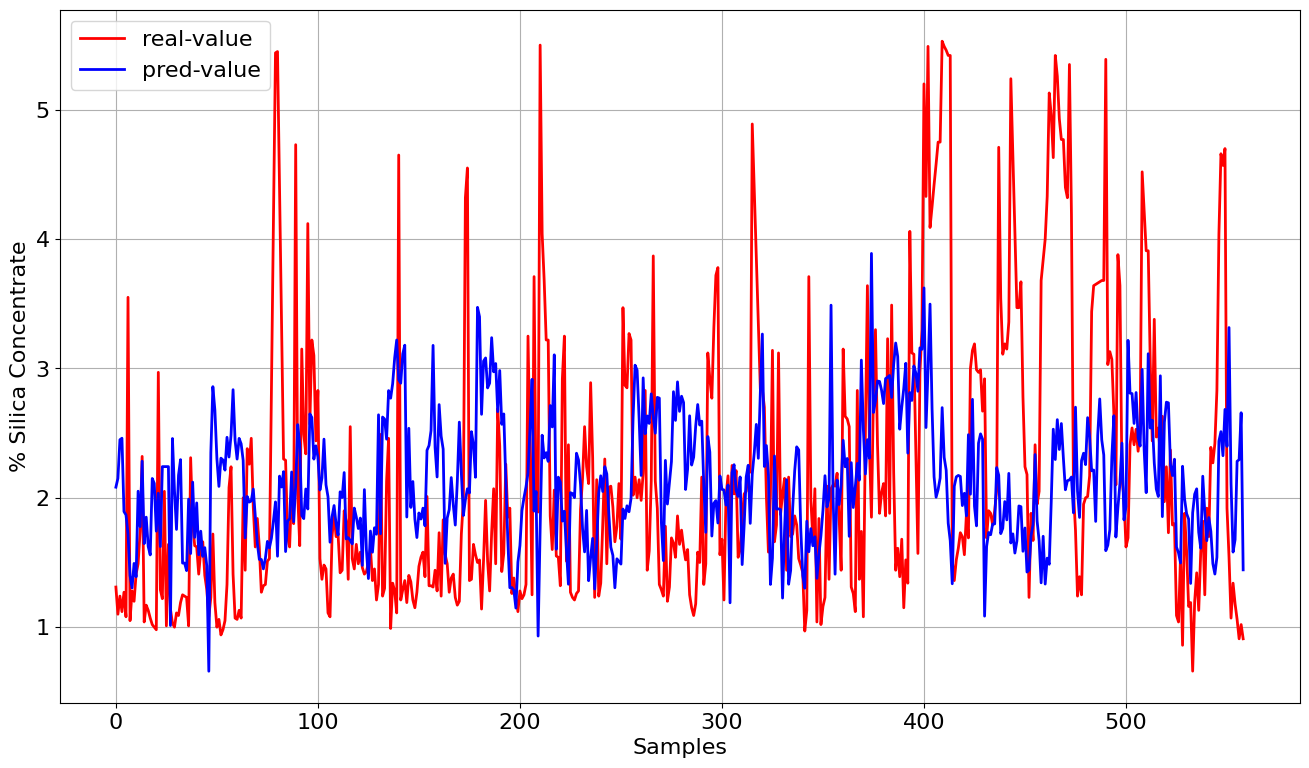

In [36]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_full.loc[len(result_znorm_full)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### Modelos utilizando as features agregadas e normalizadas por Min-Max

---

In [37]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [38]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 4) (2233, 1)
(559, 4) (559, 1)
(698, 4) (698, 1)


In [39]:
#Criando DF para resultado
result_minmax_agg = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

MAE =  0.873238863354583
MSE =  1.2150088543544044
R2 =  -0.01756371157965697


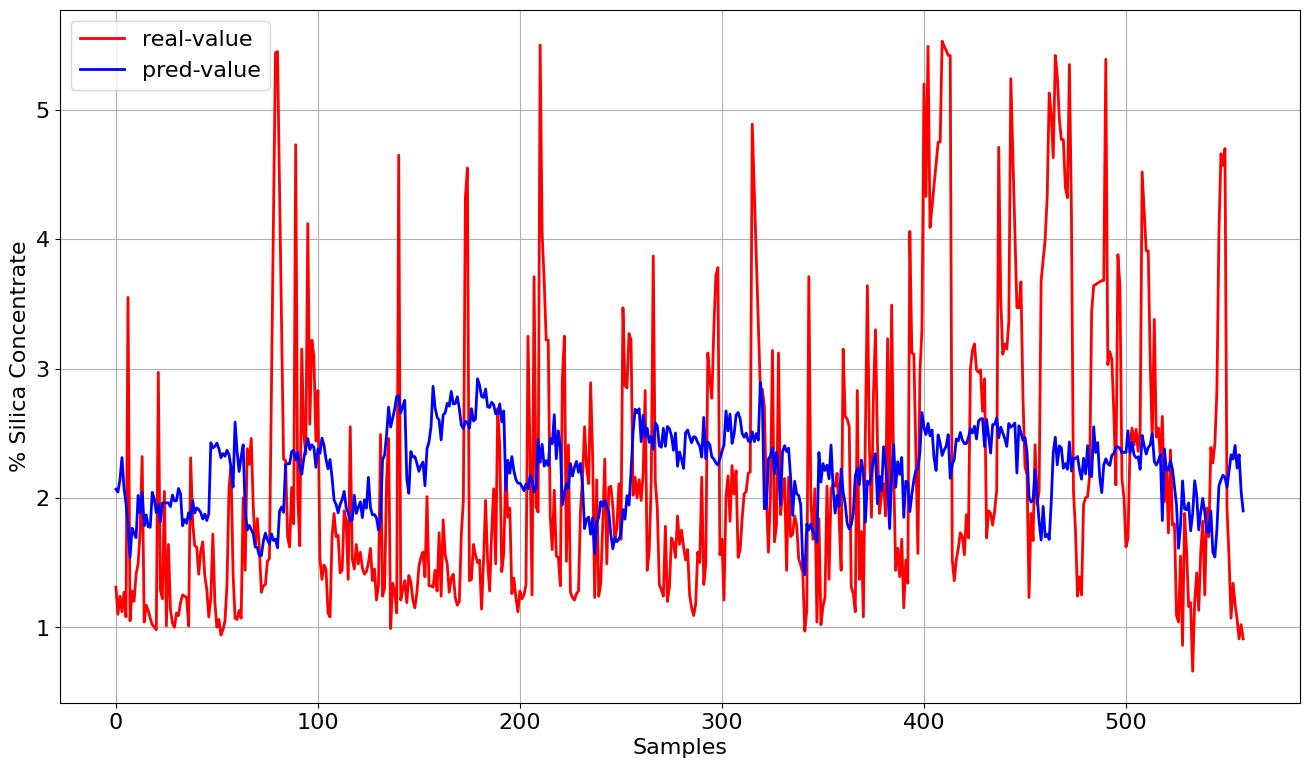

In [40]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_minmax_agg.loc[len(result_minmax_agg)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Modelo Polinomial

MAE =  0.8614488930924189
MSE =  1.20721248321816
R2 =  -0.011034290562009774


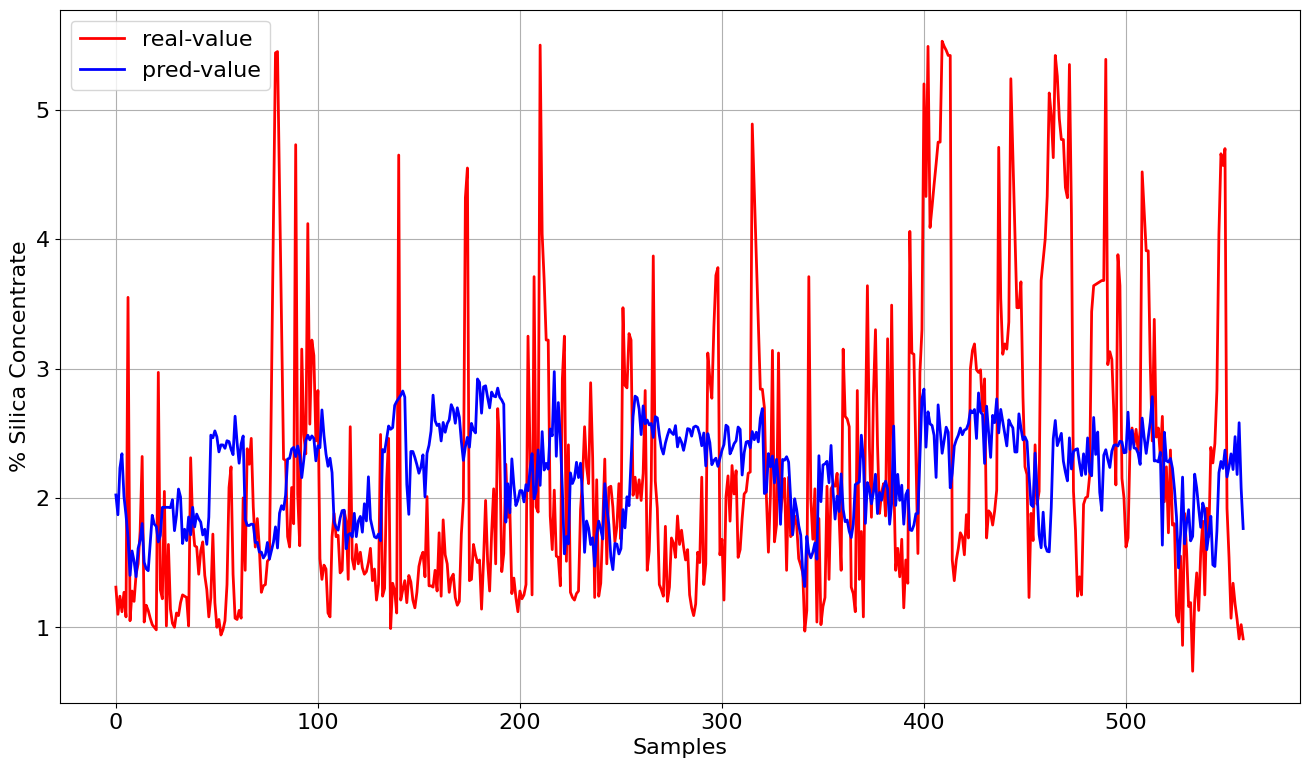

In [41]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Support Vecto Machine - SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8211118690624085
MSE =  1.2776803487393278
R2 =  -0.07005076812086375


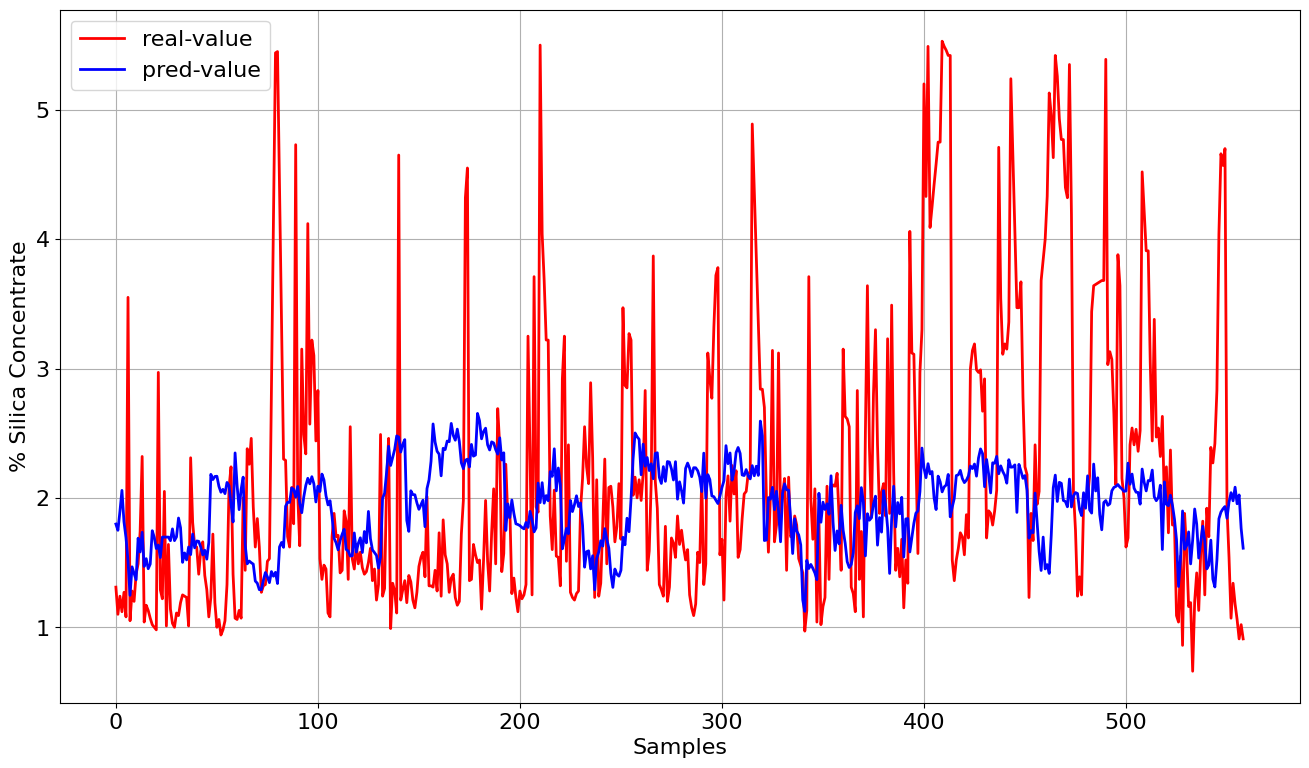

In [42]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8631351423795175
MSE =  1.4780953830272967
R2 =  -0.2378973360002321


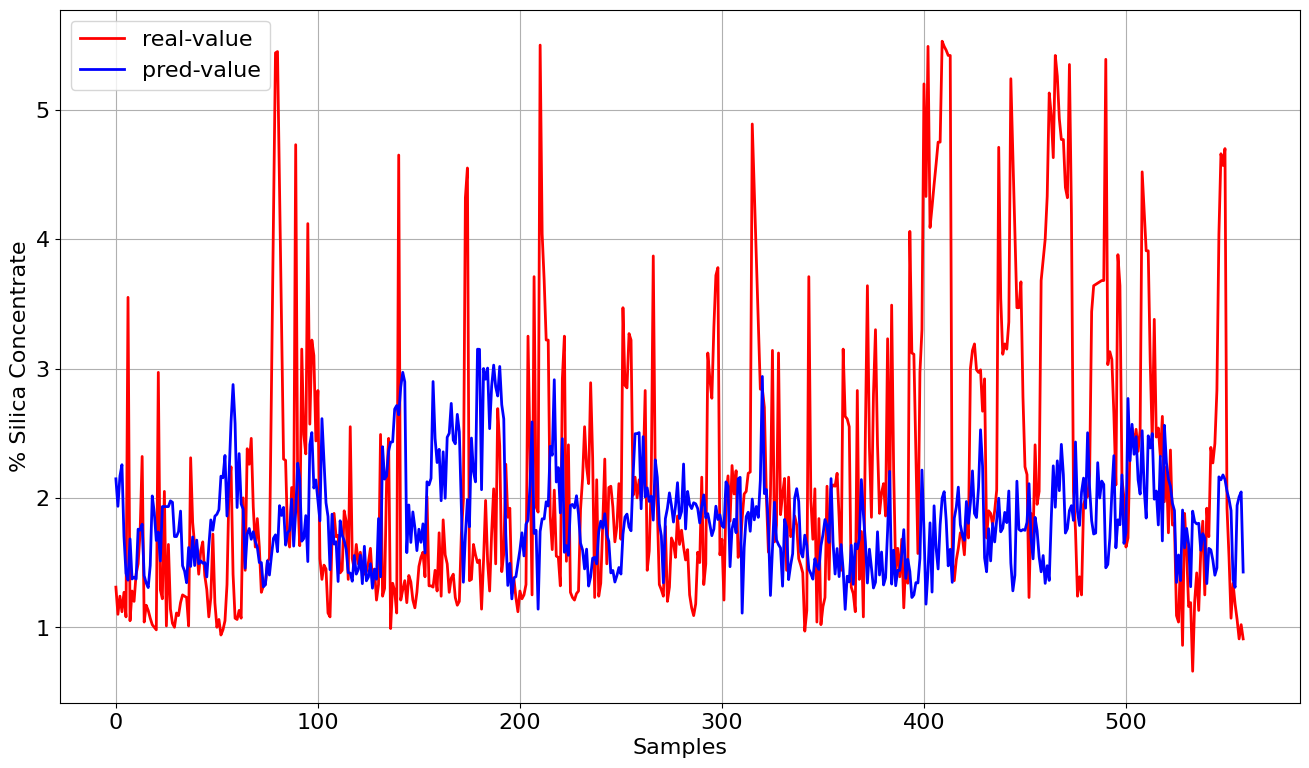

In [43]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8143439902598801
MSE =  1.2471860794377017
R2 =  -0.044511973287175044


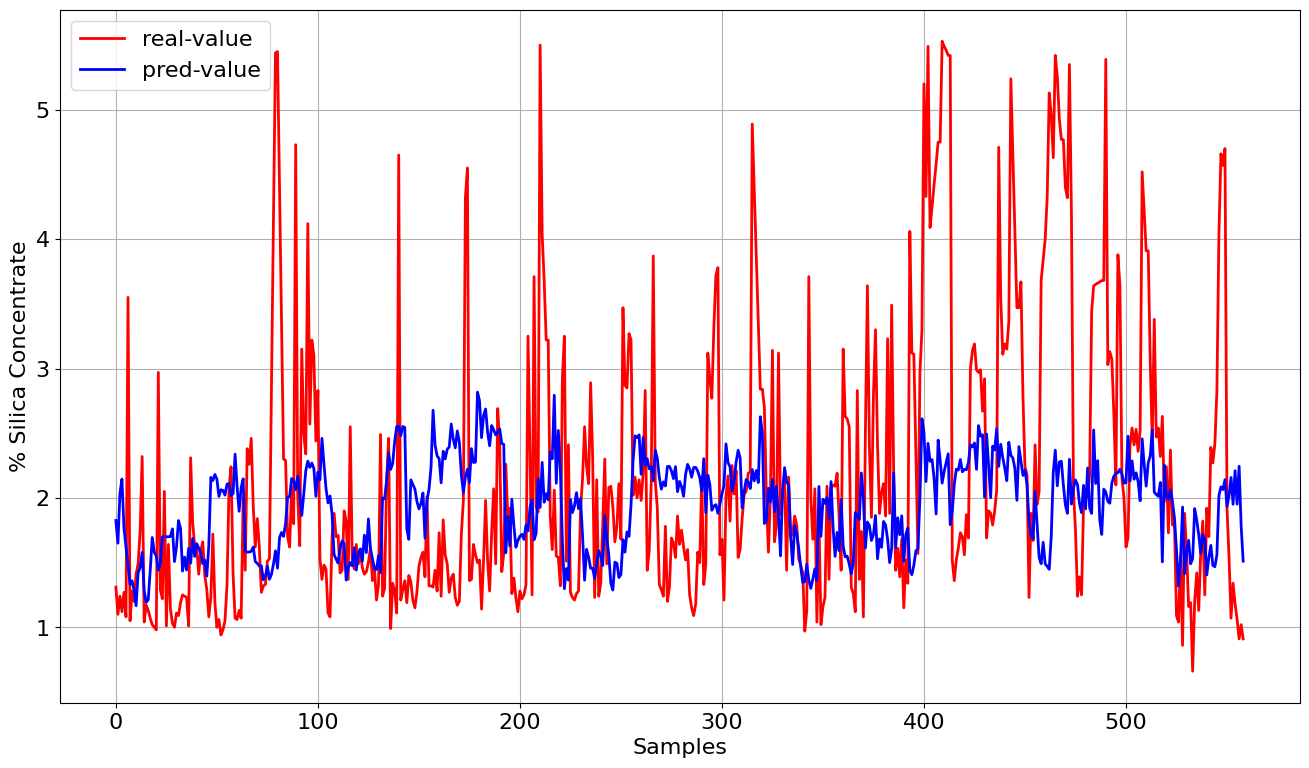

In [44]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.901031055456171
MSE =  1.377980377647225
R2 =  -0.15405153019045148


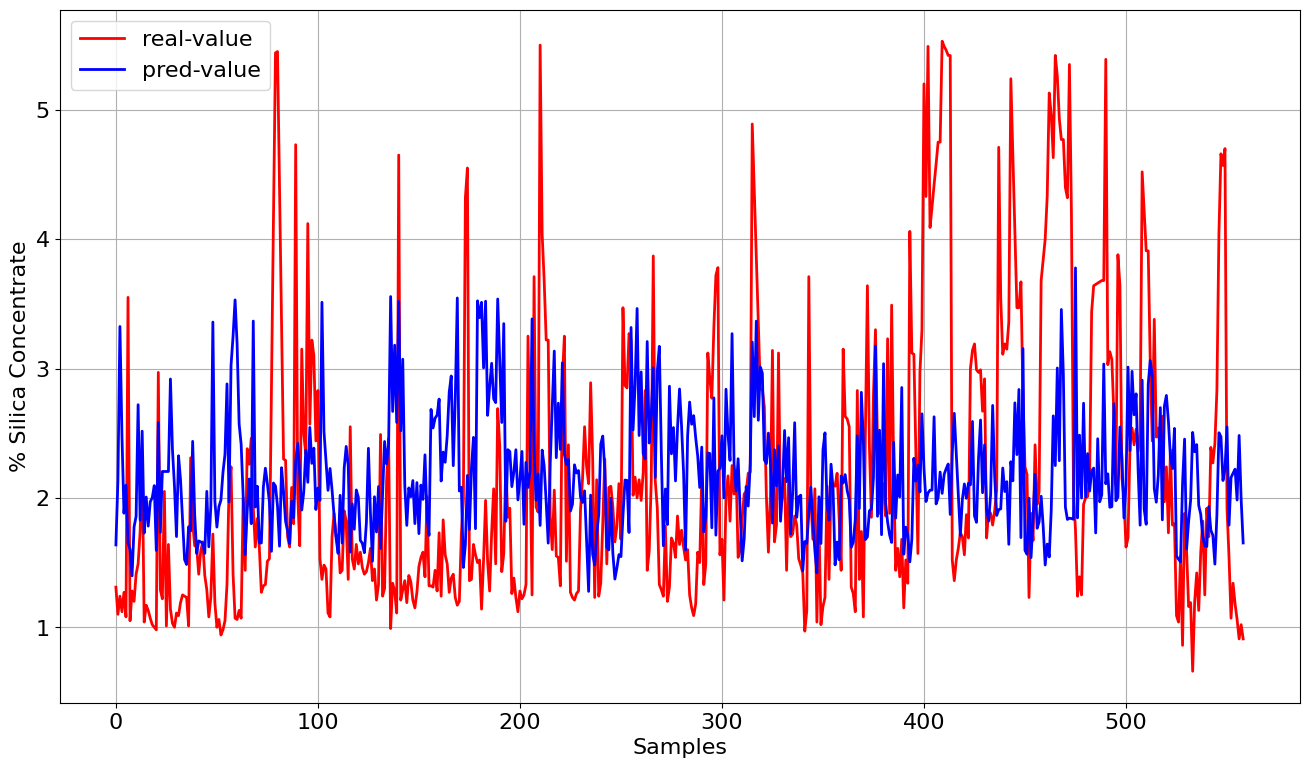

In [45]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8715280213079206
MSE =  1.227741793743005
R2 =  -0.02822748330210101


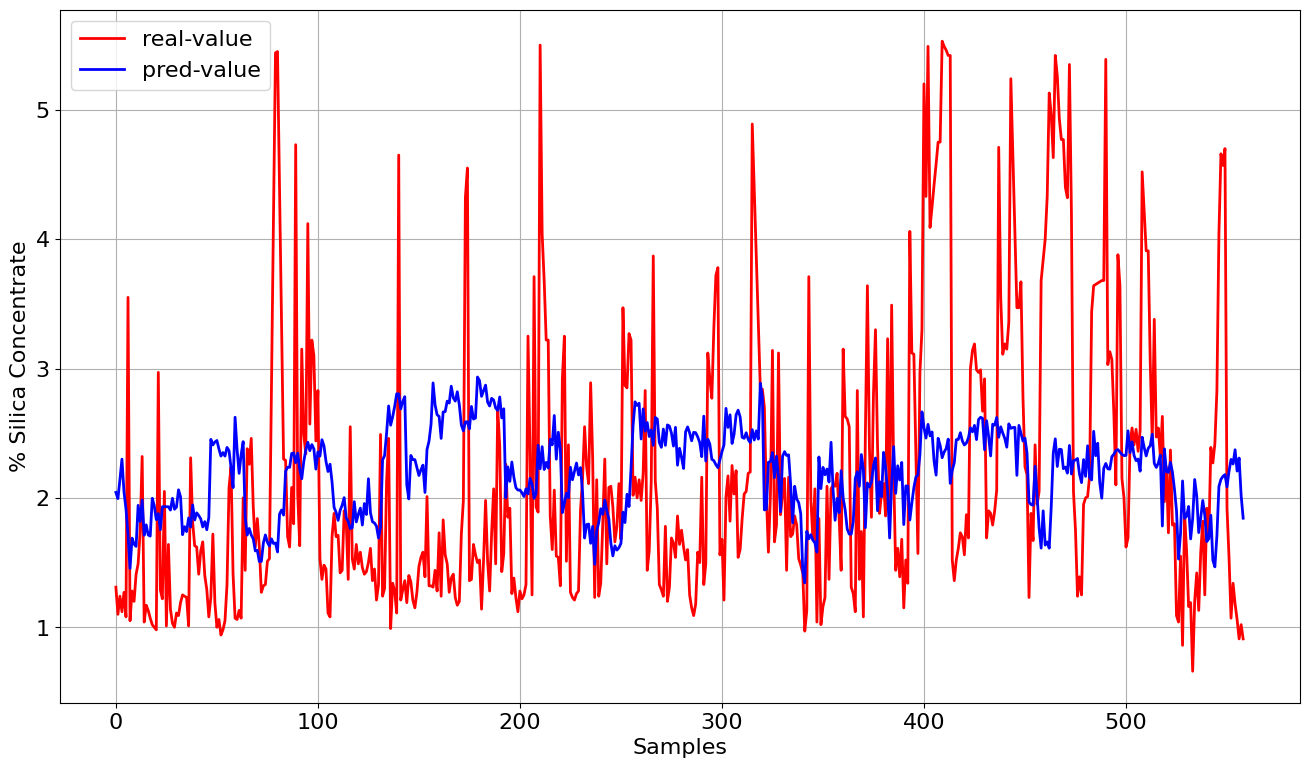

In [46]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_minmax_agg.loc[len(result_minmax_agg)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### Modelos utilizando as features agregadas e normalizadas por z-norm

---

In [47]:
x=df_resampled[features_agg]
y=df_resampled[target]

scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_normalized,y,test_size = 0.2, shuffle = False)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.2, shuffle = False)

In [48]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2233, 4) (2233, 1)
(559, 4) (559, 1)
(698, 4) (698, 1)


In [49]:
#Criando DF para resultado
result_znorm_agg = pd.DataFrame(columns=['Model','MAE','MSE','R2'])

MAE =  0.873238863354583
MSE =  1.2150088543544044
R2 =  -0.01756371157965697


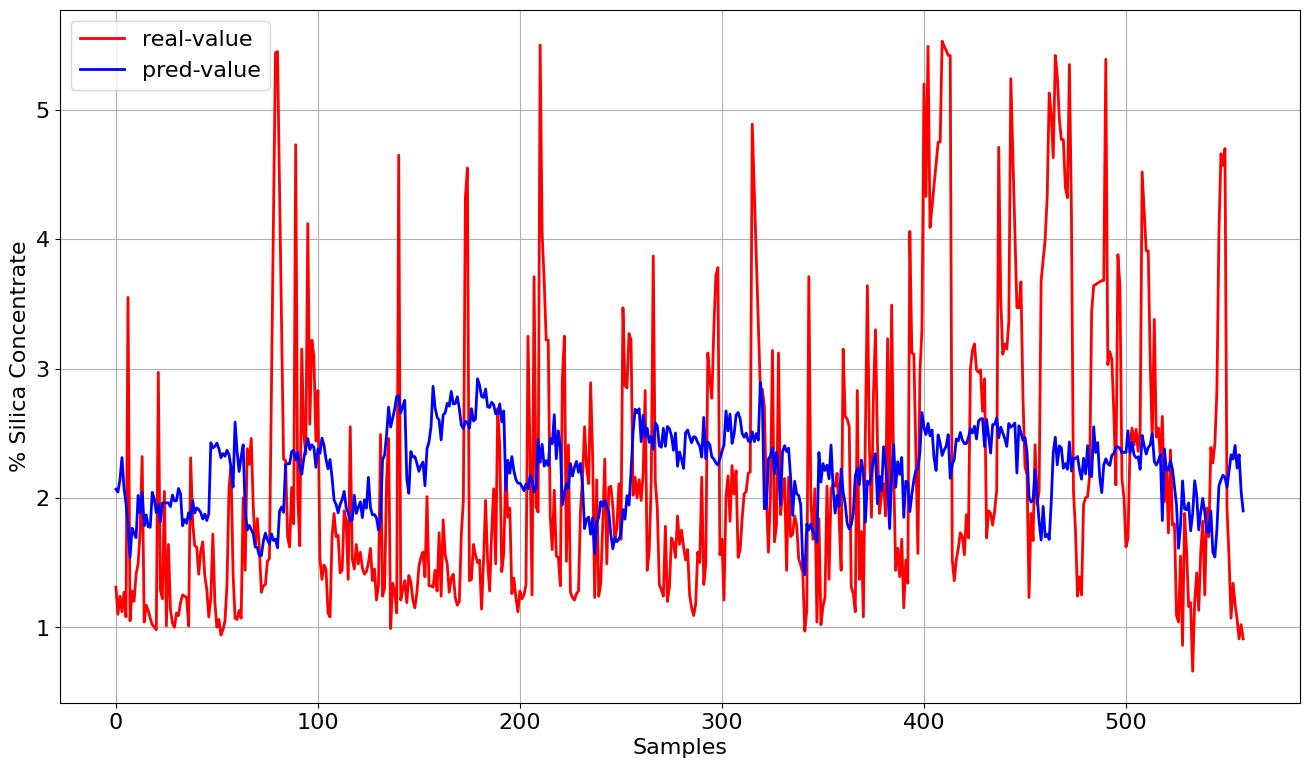

In [50]:
model_lin = LinearRegression()
model_lin.fit(x_train,y_train)
prediction = model_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)

result_znorm_agg.loc[len(result_znorm_agg)] = ['Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Modelo Polinomial

MAE =  0.8614488930924196
MSE =  1.2072124832181599
R2 =  -0.011034290562009774


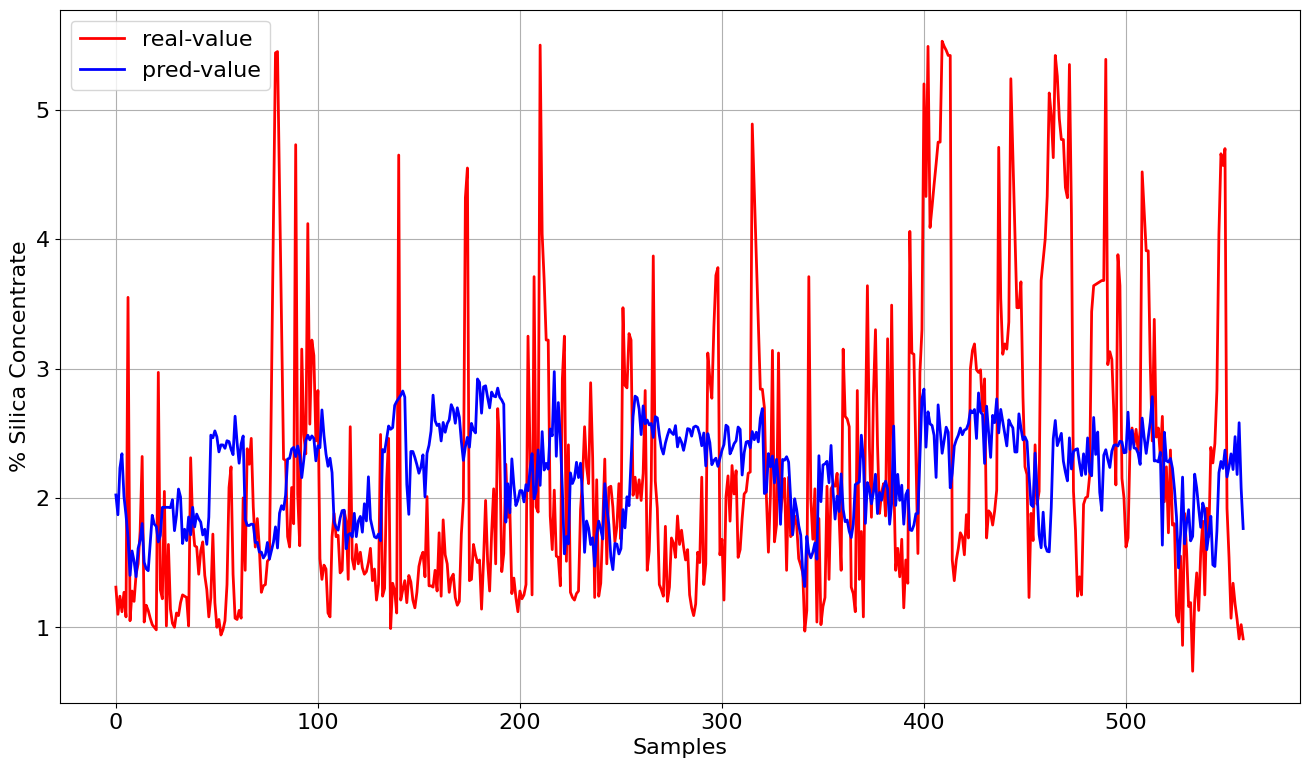

In [51]:
poly = PolynomialFeatures(degree=2)  # Degree of the polynomial
x_train_poly = poly.fit_transform(x_train)
x_val_poly = poly.transform(x_val)

model_poly = LinearRegression()
model_poly.fit(x_train_poly,y_train)
prediction = model_poly.predict(x_val_poly)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['Poly', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Support Vecto Machine - SVR

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8217483063231357
MSE =  1.2806471926711966
R2 =  -0.07253548476483762


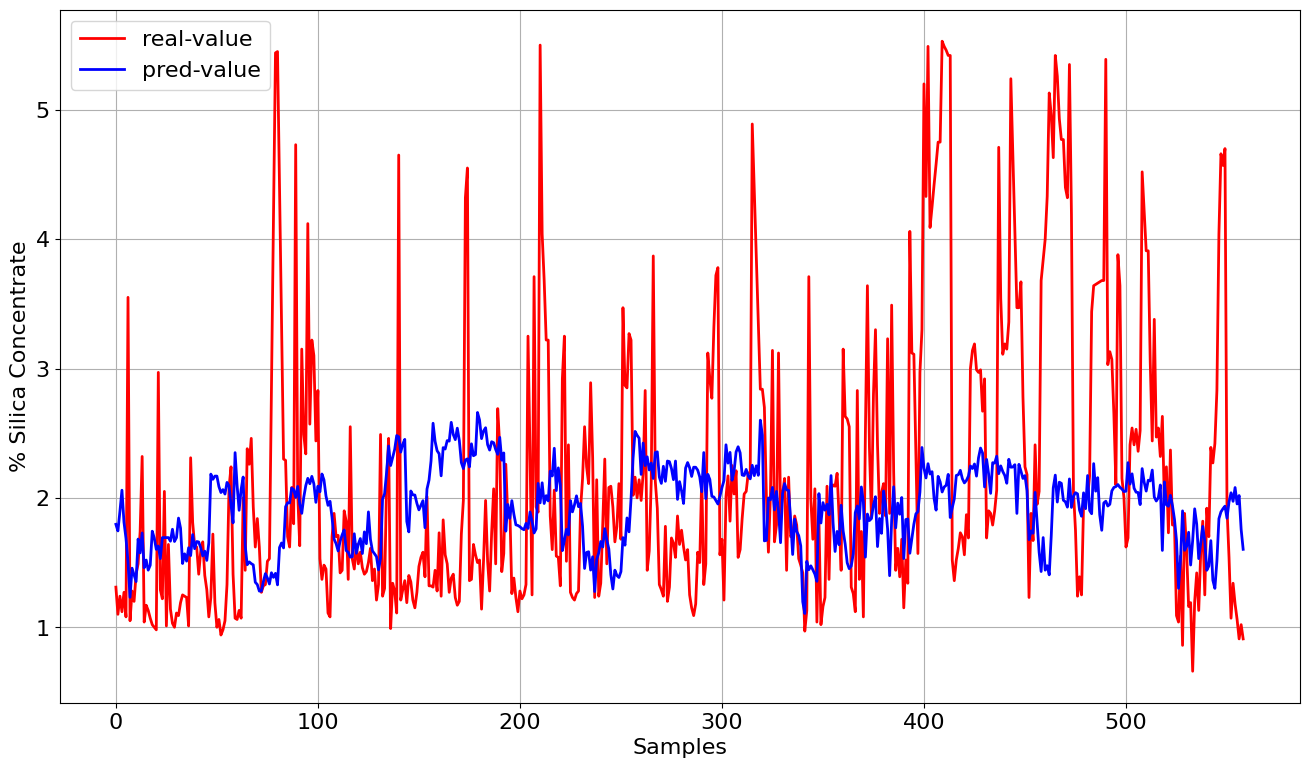

In [52]:
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train,y_train)
prediction = svr_lin.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['SVR Linear', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8737648551766879
MSE =  1.505000866675968
R2 =  -0.26043054117422626


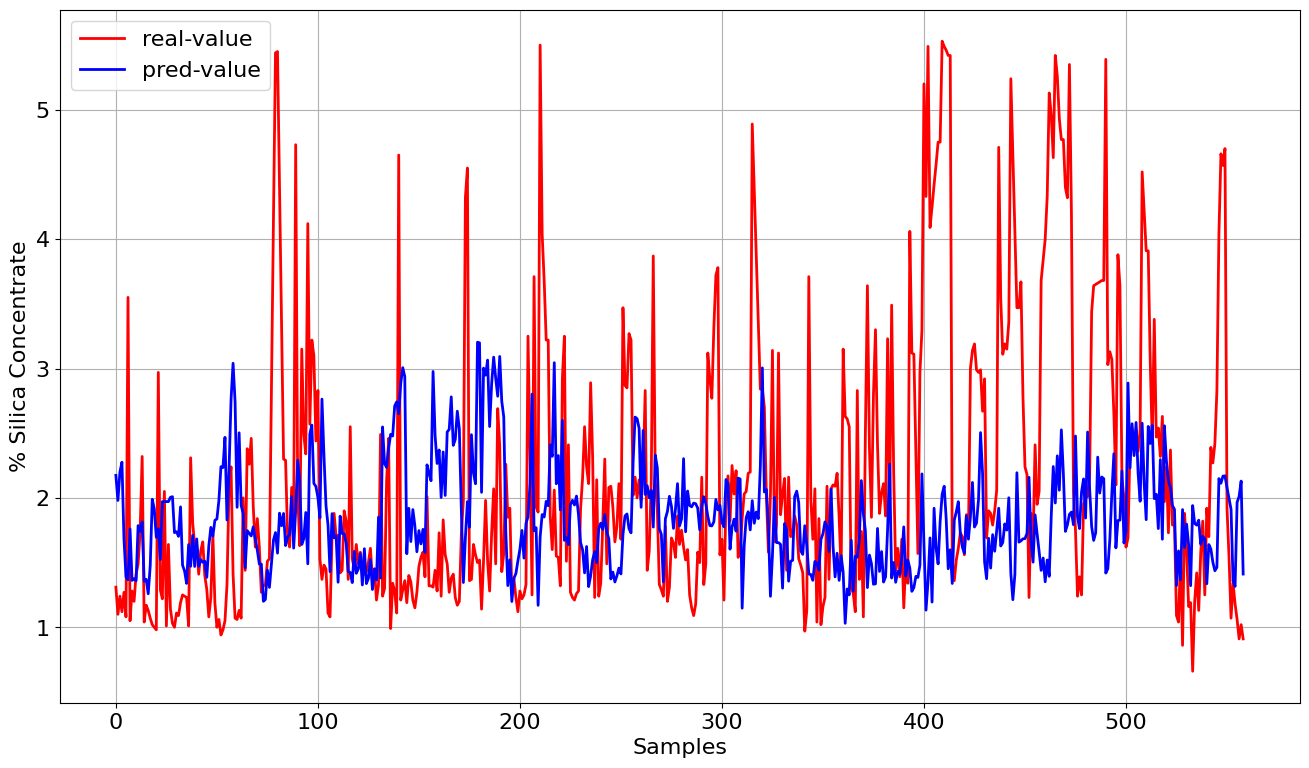

In [53]:
svr_rbf1 = SVR(kernel='rbf')
svr_rbf1.fit(x_train,y_train)
prediction = svr_rbf1.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['SVR rbf', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.9548576457042478
MSE =  1.7644689170062613
R2 =  -0.4777337084591433


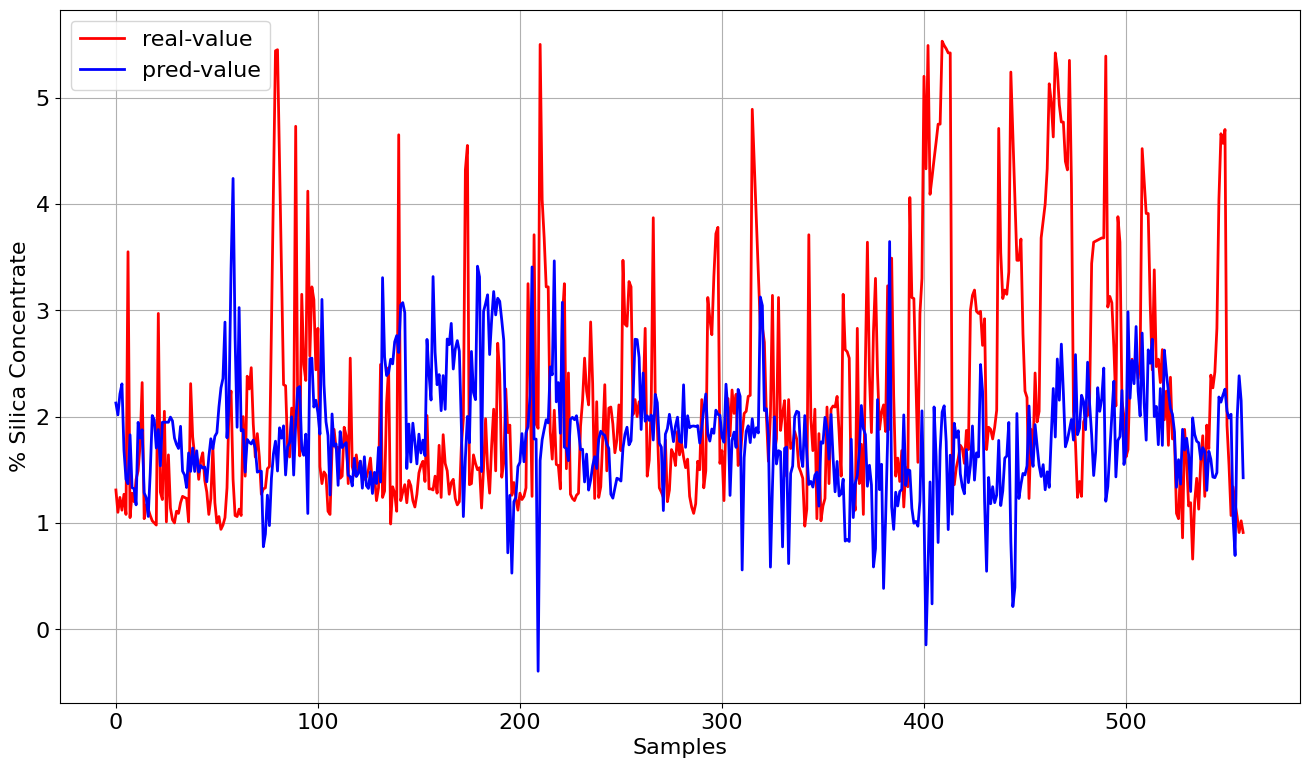

In [54]:
svr_rbf2 = SVR(kernel='rbf', C=100.0, gamma=0.1)
svr_rbf2.fit(x_train,y_train)
prediction = svr_rbf2.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['SVR rbf2', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE =  0.9004183005366718
MSE =  1.3772681166856866
R2 =  -0.15345501527203043


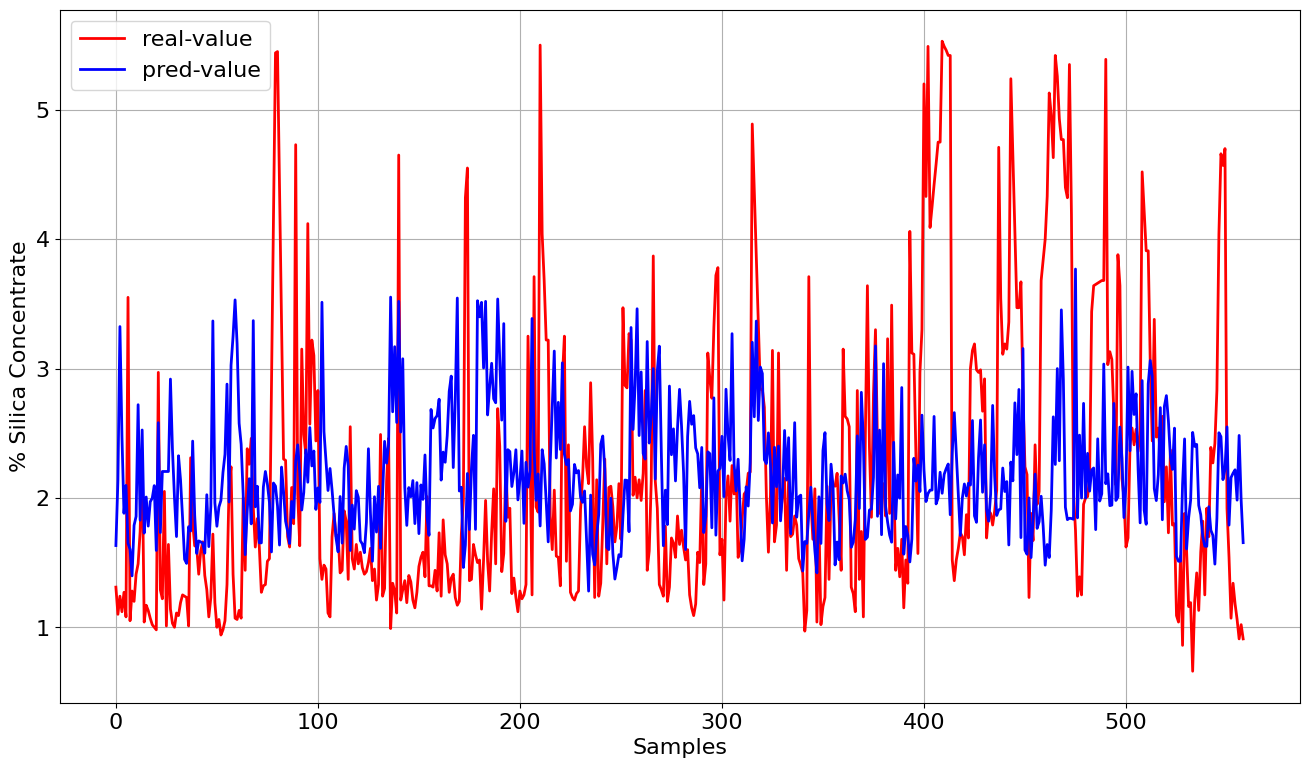

In [55]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(x_train,y_train)
prediction = rf.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['RF', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)
#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

MLP

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE =  0.8843253631497364
MSE =  1.3314234431166159
R2 =  -0.11506033524487203


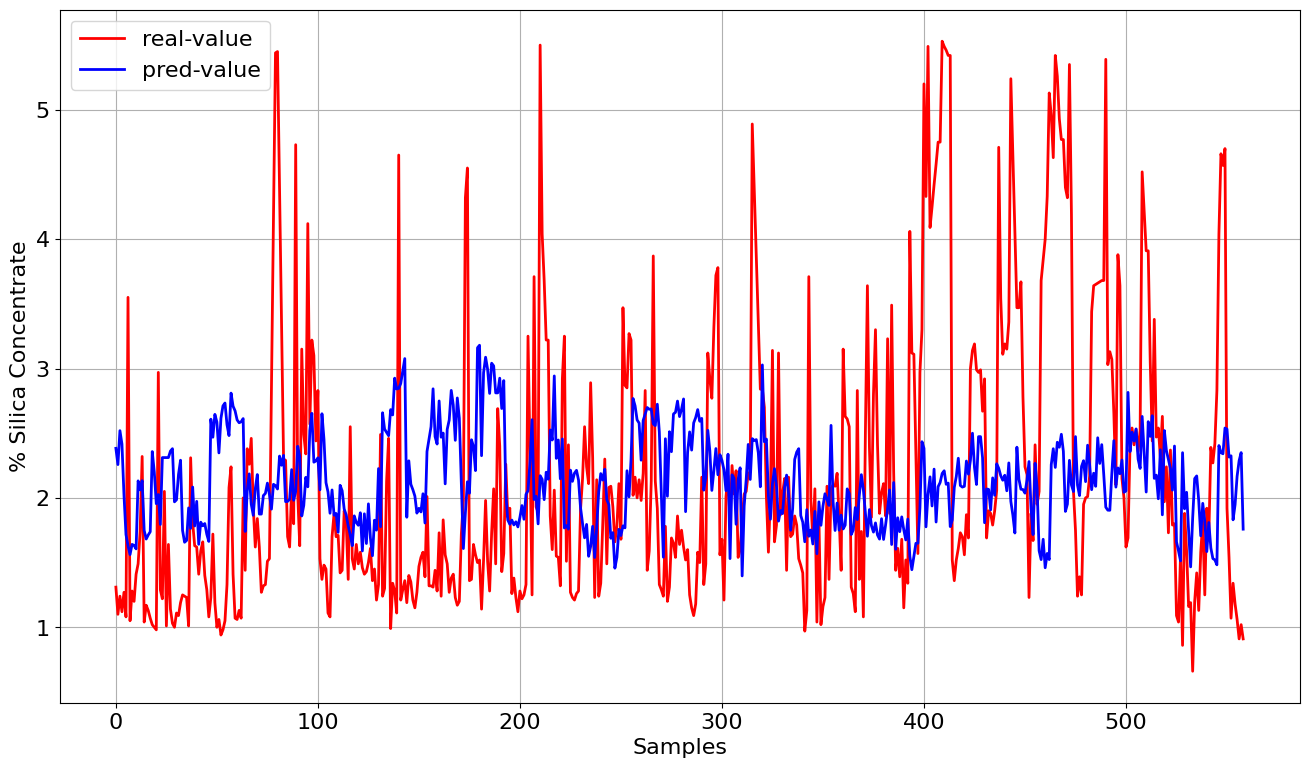

In [56]:
mlp = MLPRegressor(random_state=1, max_iter=1000)
mlp.fit(x_train,y_train)
prediction = mlp.predict(x_val)

mae = mean_absolute_error(y_val, prediction)
mse = mean_squared_error(y_val, prediction)
r2 = r2_score(y_val, prediction)
result_znorm_agg.loc[len(result_znorm_agg)] = ['MLP', mae, mse, r2]

print("MAE = ", mae)
print("MSE = ", mse)
print("R2 = ", r2)

#Visualizando resultado
fig, ax = plt.subplots(figsize=(16, 9))
plt.rcParams['font.size'] = '16'
ax.grid(True, which='both')
ax.plot(range(len(y_val)), y_val,'r',linewidth=2, label="real-value")
ax.plot(range(len(y_val)), prediction,'b',linewidth=2, label="pred-value")
#fig.suptitle('Umidade do Farelo',)
plt.xlabel('Samples',fontsize=16)
plt.ylabel('% Silica Concentrate',fontsize=16)
plt.legend()
plt.show()

### Resultados


---



In [57]:
result_minmax_full

Model       MAE       MSE        R2
0      Linear  0.884936  1.233994 -0.033463
1        Poly  1.022719  1.874706 -0.570057
2  SVR Linear  0.822966  1.273888 -0.066875
3     SVR rbf  0.837494  1.373865 -0.150605
4    SVR rbf2  0.823426  1.266069 -0.060327
5          RF  0.885942  1.242432 -0.040530
6         MLP  0.867751  1.207137 -0.010971

In [58]:
result_minmax_agg

Model       MAE       MSE        R2
0      Linear  0.873239  1.215009 -0.017564
1        Poly  0.861449  1.207212 -0.011034
2  SVR Linear  0.821112  1.277680 -0.070051
3     SVR rbf  0.863135  1.478095 -0.237897
4    SVR rbf2  0.814344  1.247186 -0.044512
5          RF  0.901031  1.377980 -0.154052
6         MLP  0.871528  1.227742 -0.028227

In [59]:
result_znorm_full

Model       MAE       MSE        R2
0      Linear  0.884936  1.233994 -0.033463
1        Poly  1.022719  1.874706 -0.570057
2  SVR Linear  0.825327  1.272301 -0.065546
3     SVR rbf  0.844749  1.378265 -0.154290
4    SVR rbf2  0.984668  1.780164 -0.490878
5          RF  0.885586  1.241637 -0.039865
6         MLP  0.881168  1.337024 -0.119751

In [60]:
result_znorm_agg

Model       MAE       MSE        R2
0      Linear  0.873239  1.215009 -0.017564
1        Poly  0.861449  1.207212 -0.011034
2  SVR Linear  0.821748  1.280647 -0.072535
3     SVR rbf  0.873765  1.505001 -0.260431
4    SVR rbf2  0.954858  1.764469 -0.477734
5          RF  0.900418  1.377268 -0.153455
6         MLP  0.884325  1.331423 -0.115060